In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install --upgrade mxnet gluoncv

Requirement already up-to-date: mxnet in /usr/local/lib/python3.6/dist-packages (1.6.0)
Requirement already up-to-date: gluoncv in /usr/local/lib/python3.6/dist-packages (0.8.0)


### Read CSV file

In [6]:
cd /content/drive/My Drive/DataSet14_20200429/raw_patient_based/

/content/drive/My Drive/DataSet14_20200429/raw_patient_based


In [6]:
ls

faster_rcnn_resnet50_v1b_custom_0000_0.0151.params
faster_rcnn_resnet50_v1b_custom_0001_0.0103.params
faster_rcnn_resnet50_v1b_custom_0002_0.0154.params
faster_rcnn_resnet50_v1b_custom_0003_0.0477.params
faster_rcnn_resnet50_v1b_custom_0004_0.0136.params
faster_rcnn_resnet50_v1b_custom_0005_0.0261.params
faster_rcnn_resnet50_v1b_custom_0006_0.0294.params
faster_rcnn_resnet50_v1b_custom_0007_0.0237.params
faster_rcnn_resnet50_v1b_custom_0008_0.0148.params
faster_rcnn_resnet50_v1b_custom_0009_0.0145.params
faster_rcnn_resnet50_v1b_custom_0010_0.0062.params
faster_rcnn_resnet50_v1b_custom_0011_0.0109.params
faster_rcnn_resnet50_v1b_custom_0012_0.0002.params
faster_rcnn_resnet50_v1b_custom_0013_0.0014.params
faster_rcnn_resnet50_v1b_custom_0014_0.0085.params
faster_rcnn_resnet50_v1b_custom_0015_0.0065.params
faster_rcnn_resnet50_v1b_custom_0016_0.0020.params
faster_rcnn_resnet50_v1b_custom_0017_0.0023.params
faster_rcnn_resnet50_v1b_custom_0018_0.0044.params
faster_rcnn_resnet50_v1b_custom

In [ ]:
import csv
with open('1_15.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            print(row[9], row[10], row[11], row[12])
            line_count += 1
    print(f'Processed {line_count} lines.')

FileNotFoundError: ignored

In [ ]:
import csv

with open('1_15.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            # print(f'Column names are {", ".join(row)}')
            line_count += 1
        print(row["BX"], row["BY"], row["Width"], row["Height"])
        line_count += 1
    print(f'Processed {line_count} lines.')

In [ ]:
# import os
# from os import path

# for dirpath, dirnames, files in os.walk('.'):
#     print(f'Found directory: {dirpath}')
#     for file_name in sorted(files):
#         # if file_name.lower().endswith('.tif'):
#         #     print(file_name)
#         #     label = file_name.replace('.tif', '.cvs')
#         #     if path.exists(label):
#         #         print("Label", label)

### Read labels

In [ ]:
import os
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [ ]:
dirName = 'Training/Bleeding/';
# Get the list of all files in directory tree at given path
listOfFiles = getListOfFiles(dirName)
print(listOfFiles)

['Training/Bleeding/Patient 31A/31_21.tif', 'Training/Bleeding/Patient 31A/31_35.tif', 'Training/Bleeding/Patient 31A/31_21.csv', 'Training/Bleeding/Patient 31A/31_35.csv', 'Training/Bleeding/Patient 32A/32_6.tif', 'Training/Bleeding/Patient 32A/32_31.tif', 'Training/Bleeding/Patient 32A/32_6.csv', 'Training/Bleeding/Patient 32A/32_31.csv', 'Training/Bleeding/Patient 45/45_21.csv', 'Training/Bleeding/Patient 45/45_9.tif', 'Training/Bleeding/Patient 45/45_37.csv', 'Training/Bleeding/Patient 45/45_33.csv', 'Training/Bleeding/Patient 45/45_25.csv', 'Training/Bleeding/Patient 45/45_43.csv', 'Training/Bleeding/Patient 45/45_13.tif', 'Training/Bleeding/Patient 45/45_41.csv', 'Training/Bleeding/Patient 45/45_44.csv', 'Training/Bleeding/Patient 45/45_17.tif', 'Training/Bleeding/Patient 45/45_29.tif', 'Training/Bleeding/Patient 45/45_25.tif', 'Training/Bleeding/Patient 45/45_33.tif', 'Training/Bleeding/Patient 45/45_37.tif', 'Training/Bleeding/Patient 45/45_9.csv', 'Training/Bleeding/Patient 45

In [ ]:
# import csv

# bboxes = []
# with open('46_3.csv', mode='r') as csv_file:
#     csv_reader = csv.DictReader(csv_file)
#     line_count = 0
#     for row in csv_reader:
#         bboxes.append([row["BX"], row["BY"], row["Width"], row["Height"]])

# print(bboxes)

In [ ]:
import csv
def getBbox(dirName):
    bboxes = []
    with open(dirName, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        line_count = 0
        for row in csv_reader:
            bboxes.append([int(row["BX"]), int(row["BY"]), int(row["BX"]) + 
                           int(row["Width"]), int(row["BY"]) + int(row["Height"])])
    return bboxes

In [ ]:
# for files in listOfFiles:
#     if files.endswith('.tif'):
#         print(files)
#         label = files.replace('.tif', '.csv')
#         if label in listOfFiles:
#             bbox = getBbox(label)       
#             print(bbox[0])

In [ ]:
import numpy as np
import os, zipfile
from gluoncv import utils
import mxnet as mx
from matplotlib import pyplot as plt

Training/Bleeding/Patient 1/1_11.tif
Training/Bleeding/Patient 1/1_13.tif
Training/Bleeding/Patient 1/1_15.tif


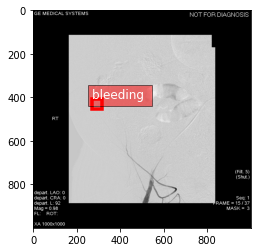

Training/Bleeding/Patient 1/1_17.tif


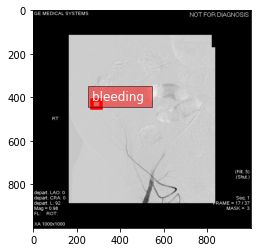

Training/Bleeding/Patient 1/1_21.tif


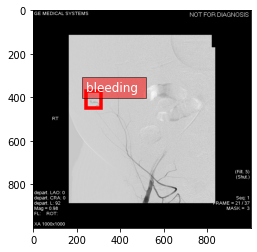

Training/Bleeding/Patient 1/1_23.tif


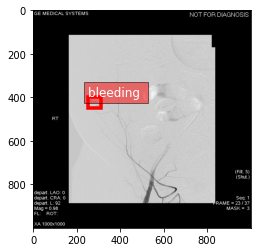

Training/Bleeding/Patient 1/1_25.tif


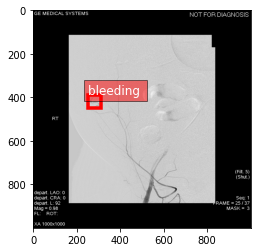

Training/Bleeding/Patient 1/1_27.tif


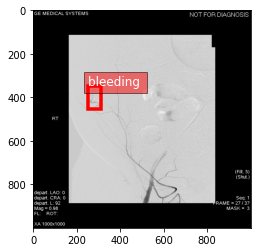

Training/Bleeding/Patient 1/1_29.tif


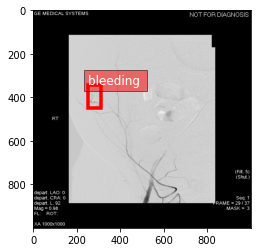

Training/Bleeding/Patient 1/1_31.tif


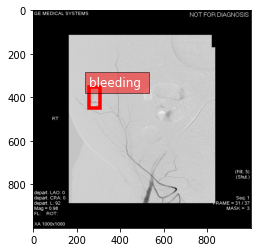

Training/Bleeding/Patient 1/1_33.tif


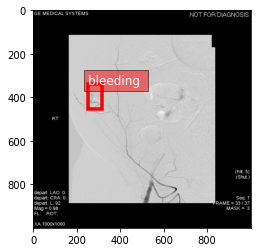

Training/Bleeding/Patient 1/1_35.tif


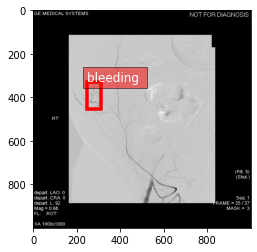

Training/Bleeding/Patient 1/1_37.tif


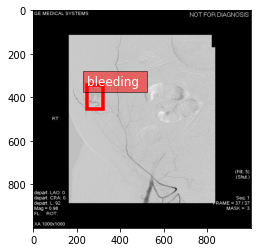

Training/Bleeding/Patient 1/1_5.tif
Training/Bleeding/Patient 1/1_7.tif
Training/Bleeding/Patient 1/1_9.tif
Training/Bleeding/Patient 11/11_10.tif
Training/Bleeding/Patient 11/11_11.tif


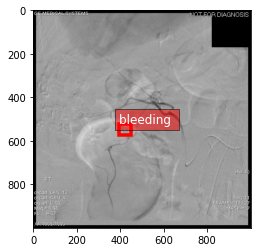

Training/Bleeding/Patient 11/11_12.tif


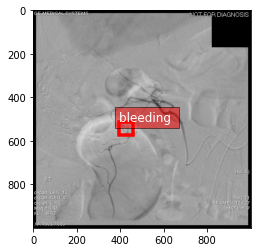

Training/Bleeding/Patient 11/11_13.tif


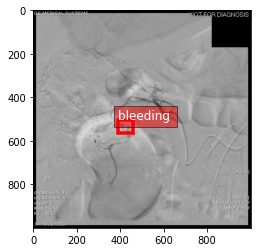

Training/Bleeding/Patient 11/11_14.tif


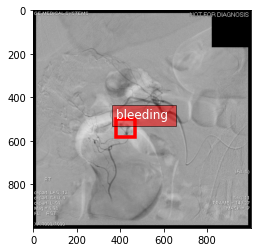

Training/Bleeding/Patient 11/11_15.tif


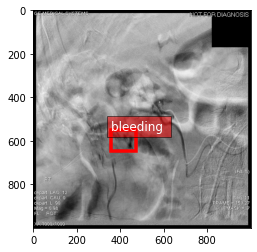

Training/Bleeding/Patient 11/11_16.tif


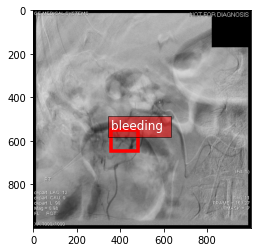

Training/Bleeding/Patient 11/11_17.tif


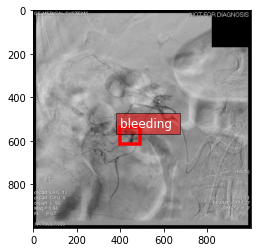

Training/Bleeding/Patient 11/11_18.tif


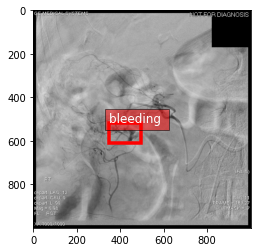

Training/Bleeding/Patient 11/11_20 (1).tif
Training/Bleeding/Patient 11/11_20.tif


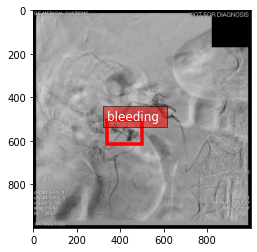

Training/Bleeding/Patient 11/11_26.tif


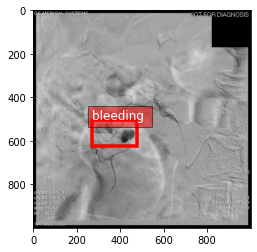

Training/Bleeding/Patient 11/11_27.tif


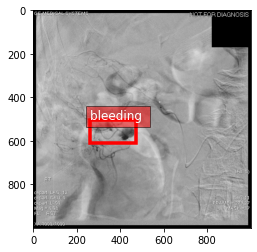

Training/Bleeding/Patient 11/11_8.tif
Training/Bleeding/Patient 11/11_9.tif
Training/Bleeding/Patient 12/12_10.tif
Training/Bleeding/Patient 12/12_11.tif
Training/Bleeding/Patient 12/12_12.tif
Training/Bleeding/Patient 12/12_13.tif


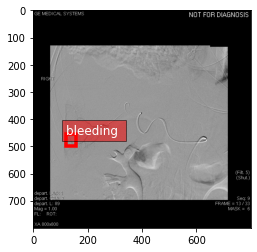

Training/Bleeding/Patient 12/12_14.tif


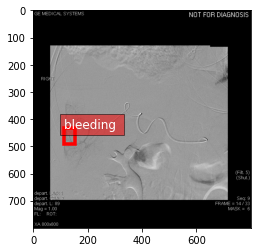

Training/Bleeding/Patient 12/12_15.tif


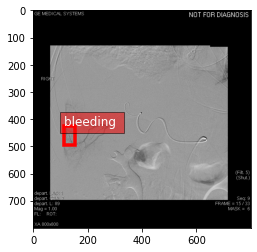

Training/Bleeding/Patient 12/12_17.tif


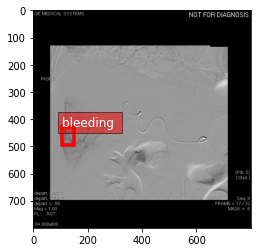

Training/Bleeding/Patient 12/12_18.tif


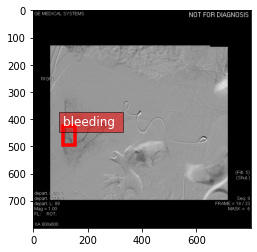

Training/Bleeding/Patient 12/12_20.tif


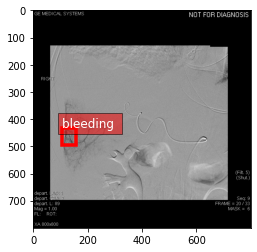

Training/Bleeding/Patient 12/12_21.tif


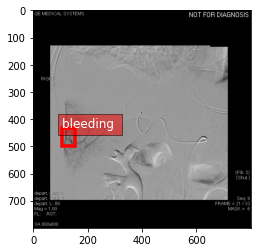

Training/Bleeding/Patient 12/12_23.tif


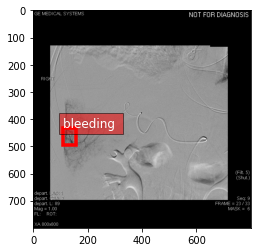

Training/Bleeding/Patient 12/12_24.tif


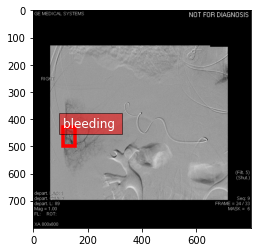

Training/Bleeding/Patient 12/12_26.tif


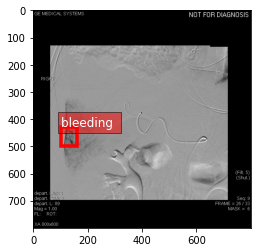

Training/Bleeding/Patient 12/12_27.tif


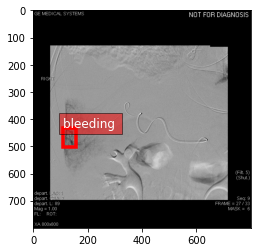

Training/Bleeding/Patient 12/12_29.tif


KeyboardInterrupt: ignored

In [ ]:
for files in sorted(listOfFiles):
    if files.endswith('.tif'):
        print(files)
        im_fname = files
        img = mx.image.imread(im_fname)
        label = files.replace('.tif', '.csv')
        if label in listOfFiles:
            all_boxes = np.array(getBbox(label))
            all_ids = []
            class_names = []
            for x in range(len(all_boxes)):
                all_ids.append(0)
                class_names.append("bleeding")
            class_names = np.array(class_names)
            all_ids = np.array(all_ids)
            # print(all_boxes)
            # print(all_ids)
            # print(class_names)
            ax = utils.viz.plot_bbox(img, all_boxes, labels=all_ids, class_names=class_names)
            plt.show()

In [ ]:
import numpy as np
import os, zipfile
from gluoncv import utils
import mxnet as mx
from matplotlib import pyplot as plt

for files in sorted(listOfFiles):
    if files.endswith('.tif'):
        print(files)
        label = files.replace('.tif', '.csv')
        if label in listOfFiles:
            all_boxes = np.array(getBbox(label))
            all_ids = []
            class_names = []
            for x in range(len(all_boxes)):
                all_ids.append(0)
                class_names.append("bleeding")
            class_names = np.array(class_names)
            all_ids = np.array(all_ids)

Training/Bleeding/Patient 1/1_11.tif
Training/Bleeding/Patient 1/1_13.tif
Training/Bleeding/Patient 1/1_15.tif
Training/Bleeding/Patient 1/1_17.tif
Training/Bleeding/Patient 1/1_21.tif
Training/Bleeding/Patient 1/1_23.tif
Training/Bleeding/Patient 1/1_25.tif
Training/Bleeding/Patient 1/1_27.tif
Training/Bleeding/Patient 1/1_29.tif
Training/Bleeding/Patient 1/1_31.tif
Training/Bleeding/Patient 1/1_33.tif
Training/Bleeding/Patient 1/1_35.tif
Training/Bleeding/Patient 1/1_37.tif
Training/Bleeding/Patient 1/1_5.tif
Training/Bleeding/Patient 1/1_7.tif
Training/Bleeding/Patient 1/1_9.tif
Training/Bleeding/Patient 11/11_10.tif
Training/Bleeding/Patient 11/11_11.tif
Training/Bleeding/Patient 11/11_12.tif
Training/Bleeding/Patient 11/11_13.tif
Training/Bleeding/Patient 11/11_14.tif
Training/Bleeding/Patient 11/11_15.tif
Training/Bleeding/Patient 11/11_16.tif
Training/Bleeding/Patient 11/11_17.tif
Training/Bleeding/Patient 11/11_18.tif
Training/Bleeding/Patient 11/11_20 (1).tif
Training/Bleeding

### our dataset

In [ ]:
cd /content/drive/My Drive/DataSet14_20200429/raw_patient_based/Training/Bleeding/Patient 1/

/content/drive/My Drive/DataSet14_20200429/raw_patient_based/Training/Bleeding/Patient 1


In [ ]:
ls

1_11.tif  1_17.csv  1_23.csv  1_27.csv  1_31.csv  1_35.csv  1_5.tif
1_13.tif  1_17.tif  1_23.tif  1_27.tif  1_31.tif  1_35.tif  1_7.tif
1_15.csv  1_21.csv  1_25.csv  1_29.csv  1_33.csv  1_37.csv  1_9.tif
1_15.tif  1_21.tif  1_25.tif  1_29.tif  1_33.tif  1_37.tif


(1000, 1000, 3)


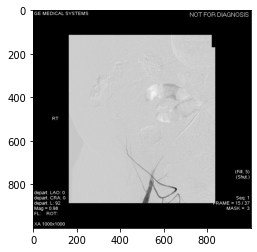

In [35]:
import os, zipfile
from gluoncv import utils
import mxnet as mx
import numpy as np
from matplotlib import pyplot as plt

im_fname = 'Training/Bleeding/Patient 1/1_15.tif'
img = mx.image.imread(im_fname)
ax = utils.viz.plot_image(img)
print(img.shape)
plt.show()

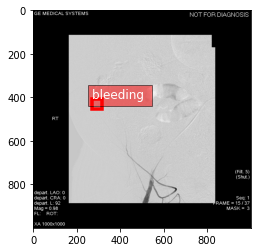

In [37]:
bleeding_label = [272, 408, 316, 454]
all_boxes = np.array([bleeding_label])
all_ids = np.array([0])
class_names = ['bleeding']

# see how it looks by rendering the boxes into image
ax = utils.viz.plot_bbox(img, all_boxes, labels=all_ids, class_names=class_names)
plt.show()

In [ ]:
def write_line(img_path, im_shape, boxes, ids, idx):
    h, w, c = im_shape
    # for header, we use minimal length 2, plus width and height
    # with A: 4, B: 5, C: width, D: height
    A = 4
    B = 5
    C = w
    D = h
    # concat id and bboxes
    labels = np.hstack((ids.reshape(-1, 1), boxes)).astype('float')
    # normalized bboxes (recommanded)
    labels[:, (1, 3)] /= float(w)
    labels[:, (2, 4)] /= float(h)
    # flatten
    labels = labels.flatten().tolist()
    str_idx = [str(idx)]
    str_header = [str(x) for x in [A, B, C, D]]
    str_labels = [str(x) for x in labels]
    str_path = [img_path]
    line = '\t'.join(str_idx + str_header + str_labels + str_path) + '\n'
    return line

In [ ]:
cd /content/drive/My Drive/DataSet14_20200429/raw_patient_based/

/content/drive/My Drive/DataSet14_20200429/raw_patient_based


In [ ]:
# i = 0
# with open('val.lst', 'w') as fw:
#     for files in sorted(listOfFiles):
#         if files.endswith('.tif'):
#             im_fname = files
#             img = mx.image.imread(im_fname)
#             label = files.replace('.tif', '.csv')
#             if label in listOfFiles:
#                 all_boxes = np.array(getBbox(label))
#                 all_ids = []
#                 for x in range(len(all_boxes)):
#                     all_ids.append(0)
#                 all_ids = np.array(all_ids)
#                 line = write_line(files, img.shape, all_boxes, all_ids, i)
#             else:
#                 line = write_line_nobbox(files, img.shape, i)
#             print(line)
#             fw.write(line)
#             i+=1

In [ ]:
import os
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [ ]:
import csv
def getBbox(dirName):
    bboxes = []
    with open(dirName, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        line_count = 0
        for row in csv_reader:
            bboxes.append([int(row["BX"]), int(row["BY"]), int(row["BX"]) + 
                           int(row["Width"]), int(row["BY"]) + int(row["Height"])])
    return bboxes

In [ ]:
i = 0
dirName = 'Training/Bleeding/';
# Get the list of all files in directory tree at given path
listOfFiles = getListOfFiles(dirName)
with open('train.lst', 'w') as fw:
    for files in sorted(listOfFiles):
        if files.endswith('.tif'):
            im_fname = files
            img = mx.image.imread(im_fname)
            label = files.replace('.tif', '.csv')
            if label in listOfFiles:
                all_boxes = np.array(getBbox(label))
                all_ids = []
                for x in range(len(all_boxes)):
                    all_ids.append(0)
                all_ids = np.array(all_ids)
                line = write_line(files, img.shape, all_boxes, all_ids, i)
                print(line)
                fw.write(line)
                i+=1

0	4	5	1000	1000	0.0	0.272	0.408	0.316	0.454	Training/Bleeding/Patient 1/1_15.tif

1	4	5	1000	1000	0.0	0.272	0.414	0.312	0.45	Training/Bleeding/Patient 1/1_17.tif

2	4	5	1000	1000	0.0	0.244	0.372	0.314	0.45	Training/Bleeding/Patient 1/1_21.tif

3	4	5	1000	1000	0.0	0.254	0.396	0.312	0.448	Training/Bleeding/Patient 1/1_23.tif

4	4	5	1000	1000	0.0	0.25	0.388	0.314	0.45	Training/Bleeding/Patient 1/1_25.tif

5	4	5	1000	1000	0.0	0.25	0.348	0.312	0.454	Training/Bleeding/Patient 1/1_27.tif

6	4	5	1000	1000	0.0	0.25	0.342	0.314	0.45	Training/Bleeding/Patient 1/1_29.tif

7	4	5	1000	1000	0.0	0.256	0.35	0.308	0.45	Training/Bleeding/Patient 1/1_31.tif

8	4	5	1000	1000	0.0	0.254	0.34	0.316	0.452	Training/Bleeding/Patient 1/1_33.tif

9	4	5	1000	1000	0.0	0.248	0.328	0.314	0.454	Training/Bleeding/Patient 1/1_35.tif

10	4	5	1000	1000	0.0	0.246	0.344	0.322	0.452	Training/Bleeding/Patient 1/1_37.tif

11	4	5	1000	1000	0.0	0.396	0.52	0.448	0.574	Training/Bleeding/Patient 11/11_11.tif

12	4	5	1000	1000	0.0	0.

In [ ]:
i = 0
dirName = 'Training/validation/';
# Get the list of all files in directory tree at given path
listOfFiles = getListOfFiles(dirName)
with open('val.lst', 'w') as fw:
    for files in sorted(listOfFiles):
        if files.endswith('.tif'):
            im_fname = files
            img = mx.image.imread(im_fname)
            label = files.replace('.tif', '.csv')
            if label in listOfFiles:
                all_boxes = np.array(getBbox(label))
                all_ids = []
                for x in range(len(all_boxes)):
                    all_ids.append(0)
                all_ids = np.array(all_ids)
                line = write_line(files, img.shape, all_boxes, all_ids, i)
                print(line)
                fw.write(line)
                i+=1

In [ ]:
import os, zipfile
from gluoncv import utils
import mxnet as mx
import numpy as np
from matplotlib import pyplot as plt
from gluoncv.data import LstDetection
lst_dataset = LstDetection('val.lst', root=os.path.expanduser('.'))
print('length:', len(lst_dataset))
first_img = lst_dataset[0][0]
print('image shape:', first_img.shape)
print('Label example:')
print(lst_dataset[0][1])
print("GluonCV swaps bounding boxes to columns 0-3 by default")

length: 132
image shape: (1000, 1000, 3)
Label example:
[[270. 128. 290. 156.   0.]]
GluonCV swaps bounding boxes to columns 0-3 by default


In [ ]:
#generate .rec format is the preferred binary record format


In [ ]:
pwd

'/content/drive/My Drive/DataSet14_20200429/raw_patient_based'

In [ ]:
!pip install gluoncv --upgrade

# if you are eager to try new features, try nightly build instead

!pip install gluoncv --pre --upgrade

Requirement already up-to-date: gluoncv in /usr/local/lib/python3.6/dist-packages (0.9.0b20200813)
Requirement already up-to-date: gluoncv in /usr/local/lib/python3.6/dist-packages (0.9.0b20200813)


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [11]:

!pip install mxnet-cu101

     |████████████████████████████████| 711.7MB 25kB/s 


In [43]:
from mxnet import nd, gpu, gluon, autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
import time

In [9]:
!  python train_faster_rcnn_custom.py  --network resnet50_v1b

[02:46:27] src/storage/storage.cc:110: Using GPUPooledRoundedStorageManager.
/usr/local/lib/python3.6/dist-packages/mxnet/gluon/parameter.py:703: UserWarning: Constant parameter "fasterrcnn0_rpn0_rpnanchorgenerator0_anchor_" does not support grad_req other than "null", and new value "write" is ignored.
  'is ignored.'.format(self.name, req))
INFO:root:Namespace(amp=False, batch_size=1, custom_model=None, dataset='voc', disable_hybridization=False, epochs=20, executor_threads=1, gpus='0', horovod=False, kv_store='nccl', log_interval=100, lr=0.001, lr_decay=0.1, lr_decay_epoch='14,20', lr_warmup=-1, lr_warmup_factor=0.3333333333333333, mixup=False, momentum=0.9, network='resnet50_v1b', no_mixup_epochs=20, norm_layer=None, num_workers=4, rcnn_smoothl1_rho=1.0, resume='', rpn_smoothl1_rho=0.1111111111111111, save_interval=1, save_prefix='faster_rcnn_resnet50_v1b_custom', seed=233, start_epoch=0, static_alloc=False, use_fpn=False, val_interval=1, verbose=False, wd=0.0005)
INFO:root:Start tr

# Load Model


In [12]:
import logging
import time
import numpy as np
import mxnet as mx
from mxnet import gluon
from mxnet.contrib import amp
import gluoncv as gcv

gcv.utils.check_version('0.7.0')
from gluoncv import data as gdata
from gluoncv import utils as gutils
from gluoncv.model_zoo import get_model
from gluoncv.data.batchify import FasterRCNNTrainBatchify, Tuple, Append
from gluoncv.data.transforms.presets.rcnn import FasterRCNNDefaultTrainTransform, \
    FasterRCNNDefaultValTransform
from gluoncv.utils.metrics.voc_detection import VOCMApMetric
from gluoncv.utils.parallel import Parallel
from gluoncv.utils.metrics.rcnn import RPNAccMetric, RPNL1LossMetric, RCNNAccMetric, \
    RCNNL1LossMetric
from gluoncv.model_zoo.rcnn.faster_rcnn.data_parallel import ForwardBackwardTask
from gluoncv.data import LstDetection
import argparse
import os

In [13]:
train_dataset = LstDetection('train.lst', root=os.path.expanduser('.'))
class_names = ['bleeding']

In [14]:
net = get_model('faster_rcnn_resnet50_v1b_custom', pretrained=False, classes=class_names )

In [15]:
net.load_parameters("faster_rcnn_resnet50_v1b_custom_best.params")

(1000, 1000, 3)


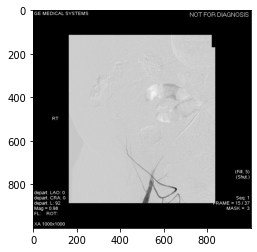

Shape of pre-processed image: (1, 3, 1000, 1000)


In [20]:
from gluoncv import utils
import numpy as np
from matplotlib import pyplot as plt
import gluoncv

im_fname = 'Training/Bleeding/Patient 1/1_15.tif'
x, img = gluoncv.data.transforms.presets.rcnn.load_test(im_fname, short=1000)
img = mx.image.imread(im_fname)
ax = utils.viz.plot_image(img)
print(img.shape)
plt.show()
print('Shape of pre-processed image:', x.shape)


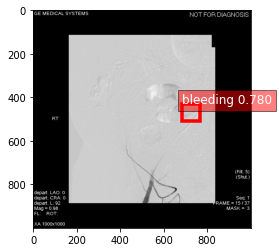

In [33]:
class_IDs, scores, bounding_boxs = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()



In [48]:
pwd

'/content/drive/My Drive/DataSet14_20200429/raw_patient_based'

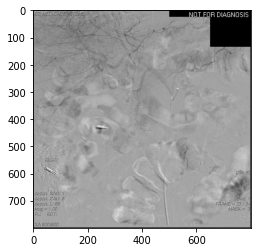

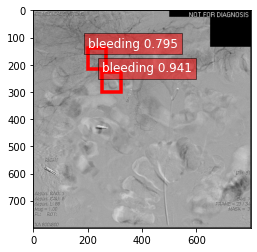

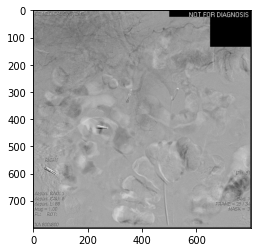

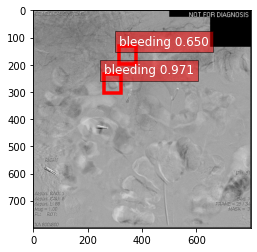

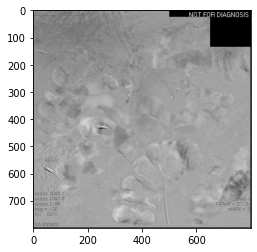

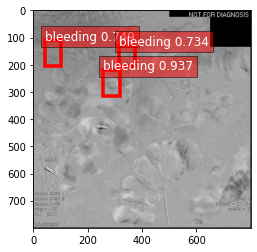

In [49]:
input_order = [23, 25, 27]
for i in input_order:
  index = str(i)
  im_fname = 'Testing/Bleeding/Patient 1002/1002_' + index + '_34.jpg'
  x, img = gluoncv.data.transforms.presets.rcnn.load_test(im_fname, short=416)
  img = mx.image.imread(im_fname)
  ax = utils.viz.plot_image(img)
  plt.show()
  class_IDs, scores, bounding_boxs = net(x)

  ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
  plt.show()


In [23]:
print (class_IDs.shape)
print(class_IDs)


(1, 300, 1)

[[[ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [

In [24]:
print(scores)


[[[ 0.7800367 ]
  [ 0.3931098 ]
  [ 0.28014722]
  [ 0.05920791]
  [ 0.04333202]
  [ 0.02690542]
  [ 0.02610104]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1. 